In [1]:
import pyemu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import flopy as fp
from flopy.utils.reference import SpatialReference
import os
import sys
from shutil import copyfile
import fileinput

sys.path.append("../../modules")
# hand made functions
from Rouss import *

flopy is installed in C:\Users\emmal\Anaconda3\lib\site-packages\flopy


In [2]:
ws = "workspace"
m_n_i = "pest_2d_r"
m_n = "pest_2D_R"

case = "2D_test"

In [3]:
sim = fp.mf6.MFSimulation.load(sim_ws=ws)
m = sim.get_model(m_n_i)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package oc...
    loading package obs...
    loading package npf...
    loading package rch...
    loading package rch...
    loading package rch...
    loading package wel...
    loading package wel...
    loading package chd...
    loading package chd...
    loading package drn...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
  loading ims package pest_2d_r...


In [4]:
sr = SpatialReference(delr=m.dis.delr.array, delc=m.dis.delc.array, xll=m.dis.xorigin.array, yll=m.dis.yorigin.array)
sr

xul:664525; yul:6207475; rotation:0; proj4_str:None; units:meters; lenuni:2; length_multiplier:1.0

In [5]:
# empty pst object
template_ws = "template"
pf = pyemu.prototypes.PstFrom(original_d=ws, new_d=template_ws,
                 remove_existing=True,
                 longnames=True, spatial_reference=sr,
                 zero_based=False)

2020-07-30 22:09:25.857318 starting: opening PstFrom.log for logging
2020-07-30 22:09:25.858319 starting PstFrom process
2020-07-30 22:09:25.865318 starting: setting up dirs
2020-07-30 22:09:25.866318 starting: removing existing new_d 'template'
2020-07-30 22:09:25.888317 finished: removing existing new_d 'template' took: 0:00:00.021999
2020-07-30 22:09:25.889318 starting: copying original_d 'workspace' to new_d 'template'
2020-07-30 22:09:25.980314 finished: copying original_d 'workspace' to new_d 'template' took: 0:00:00.090996
2020-07-30 22:09:25.982315 finished: setting up dirs took: 0:00:00.116997


In [6]:
#add observation
df = pd.read_csv(os.path.join(template_ws,"heads.csv"),index_col=0)

hds_df = pf.add_observations("heads.csv",insfile="heads.csv.ins",index_cols="time",
                use_cols=list(df.columns.values),prefix="hds",obsgp=False)

file = "heads_pcmap.csv"
df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
                use_cols=list(df.columns.values),prefix="pcmap",obsgp=True)

2020-07-30 22:09:26.022313 starting: adding observations from tabular output file
2020-07-30 22:09:26.023314 starting: reading list template\heads.csv
2020-07-30 22:09:26.036313 finished: reading list template\heads.csv took: 0:00:00.012999
2020-07-30 22:09:26.038313 starting: building insfile for tabular output file heads.csv
2020-07-30 22:09:26.110311 finished: building insfile for tabular output file heads.csv took: 0:00:00.071998
2020-07-30 22:09:26.111311 starting: adding observation from instruction file 'template\heads.csv.ins'
2020-07-30 22:09:26.144310 finished: adding observation from instruction file 'template\heads.csv.ins' took: 0:00:00.032999
2020-07-30 22:09:26.146309 finished: adding observations from tabular output file took: 0:00:00.123996
2020-07-30 22:09:26.170309 starting: adding observations from tabular output file
2020-07-30 22:09:26.171309 starting: reading list template\heads_pcmap.csv
2020-07-30 22:09:26.197308 finished: reading list template\heads_pcmap.csv 

In [7]:
pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:0, nnz_obs:322


spatial variogram


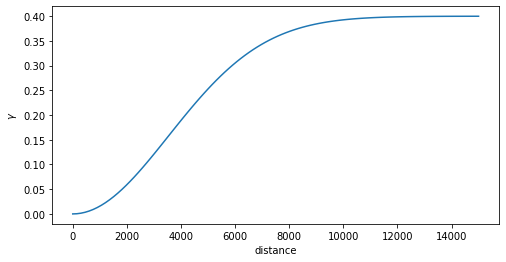

In [8]:
v = pyemu.geostats.GauVario(contribution=0.4,a=5000)
grid_gs = pyemu.geostats.GeoStruct(variograms=v, transform='log')

fig = plt.figure(figsize=(8,4))
grid_gs.plot()
print("spatial variogram")

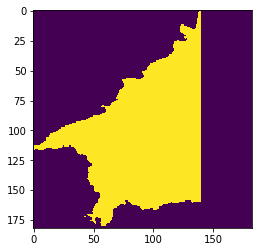

In [9]:
za = m.dis.idomain.array[0] # zone array for pp
za[:,140:]=0
plt.imshow(za)

In [10]:
pf.add_parameters(filenames="k.txt",par_type="pilotpoint",pp_space=8,zone_array=za,
                   par_name_base="kp",pargp="hp",
                   upper_bound=100,lower_bound=0.05,ult_ubound=1e-3,ult_lbound=5e-7,geostruct=grid_gs)

2020-07-30 22:09:28.031251 starting: adding pilotpoint type multiplier style parameters for file(s) ['k.txt']
2020-07-30 22:09:28.031251 starting: loading array template\k.txt
2020-07-30 22:09:28.148247 finished: loading array template\k.txt took: 0:00:00.116996
2020-07-30 22:09:28.149258 loaded array 'k.txt' of shape (182, 183)
2020-07-30 22:09:28.239246 starting: writing array-based template file 'kp_inst0_pilotpoint.csv.tpl'
2020-07-30 22:09:28.240246 starting: setting up pilot point parameters
2020-07-30 22:09:28.240246 No spatial reference (containing cell spacing) passed.
2020-07-30 22:09:28.241245 OK - using spatial reference in parent object.
2020-07-30 22:09:29.415209 169 pilot point parameters created
2020-07-30 22:09:29.417209 pilot point 'pargp':kp_inst:0
2020-07-30 22:09:29.418209 finished: setting up pilot point parameters took: 0:00:01.177963
2020-07-30 22:09:29.492206 starting: calculating factors for pargp=kp_inst:0
2020-07-30 22:09:29.493207 saving krige variance file

2020-07-30 22:11:04.503277 starting: adding zone type multiplier style parameters for file(s) ['irr.txt']
2020-07-30 22:11:04.504276 starting: loading array template\irr.txt
2020-07-30 22:11:04.564273 finished: loading array template\irr.txt took: 0:00:00.059997
2020-07-30 22:11:04.565273 loaded array 'irr.txt' of shape (182, 183)
2020-07-30 22:11:04.623271 starting: writing array-based template file 'irr_inst0_zone.csv.tpl'
2020-07-30 22:11:04.624272 starting: writing template file irr_inst0_zone.csv.tpl for ['irr_inst:0']
2020-07-30 22:11:04.796267 finished: writing template file irr_inst0_zone.csv.tpl for ['irr_inst:0'] took: 0:00:00.171995
2020-07-30 22:11:04.797266 finished: writing array-based template file 'irr_inst0_zone.csv.tpl' took: 0:00:00.173995
2020-07-30 22:11:04.825266 starting: adding parameters for file(s) ['irr.txt']


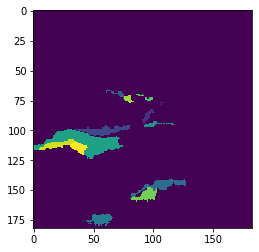

In [11]:
#irri
zi = np.loadtxt(os.path.join(ws,"zone_irr.txt"))
plt.imshow(zi)
pf.add_parameters(filenames="irr.txt",par_type="zone",zone_array=zi,
                   par_name_base="irr",pargp="irr",
                   upper_bound=2,lower_bound=0.8)

In [12]:
pf.build_pst("{}.pst".format(case))

C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\prototypes\pst_from.py:472: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  par_data = pd.concat(self.par_dfs).loc[:, par_data_cols]
C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\prototypes\pst_from.py:127: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


noptmax:30, npar_adj:183, nnz_obs:322


In [13]:
rivers = [riv for riv in os.listdir(template_ws) if riv.endswith("riv")]

def riv_tpl(rivers,tmp_ws):
    for riv in rivers:
        riv_file = os.path.join(tmp_ws,riv)
        tpl_file = riv_file+".tpl"
        copyfile(riv_file, tpl_file)
        
        with fileinput.FileInput(tpl_file, inplace=True) as file:
            for line in file:
                print(line.replace("    0.00500000   ", "~    c_{}     ~".format(riv.split(".")[0])), end='')
        with open(tpl_file, 'r+') as f:
            content = f.read()
            line = "ptf ~"
            f.seek(0, 0)
            f.write(line.rstrip('\r\n') + "\n" + content)
        
        #add parameter to control file
        dic = {"parnme":"c_{}".format(riv.split(".")[0]),
              "parval1": 0.005,
               "pargp": "cond",
               "tpl_filename": tpl_file,
               'input_filename':riv_file,
               "partype" : "constant",
               "partrans" : "log",
               "parubnd" : 0.01,
               "parlbnd" : 0.001,
               "parchglim" : "factor",
               "scale" : 1.0,
               "dercom" : 1,
               "offset" : 0.0} 
        a = pd.DataFrame(dic,index=["c_{}".format(riv.split(".")[0])])
        pf.par_dfs[0] = pf.par_dfs[0].append(a,sort=False)
        
        pf.tpl_filenames.append(riv+".tpl")
        pf.input_filenames.append(riv)
        
riv_tpl(rivers,template_ws)

In [14]:
pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:189, nnz_obs:322


In [15]:
# add run model command
pf.mod_sys_cmds.append("..\..\..\exe\mf6")
pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:189, nnz_obs:322
2020-07-30 22:11:06.590211 forward_run line:pyemu.os_utils.run(r'..\..\..\exe\mf6')



In [16]:
def chInsfle(file):
    
    """
    change a ins file create with PstFrom (only for a model with 1 stress period)
    in the right format to be used by PEST
    """
    
    fileout = "tmp"
    with open(file) as f:
        with open(fileout,"w") as fout:
            for i,line in enumerate(f):
                if i < 2:
                    fout.write(line)
                if i > 1:
                    for o,split in enumerate(line.split("w")):
                        if o == 1:
                            fout.write("~,~")
                        fout.write(split)
                        
    from shutil import copyfile
    copyfile(fileout, file) # copy 
    os.remove(fileout) # delete tmp file

chInsfle("template/heads.csv.ins")
chInsfle("template/heads_pcmap.csv.ins")

pf.obs_dfs[0].obgnme = "real_obs"
pf.obs_dfs[1].obgnme = "obs_pcmap"

noptmax:30, npar_adj:189, nnz_obs:322
2020-07-30 22:11:07.147194 WARNING: sys_cmd 'pyemu.os_utils.run(r'..\..\..\exe\mf6')
' already in sys cmds, skipping...
2020-07-30 22:11:07.181193 starting: building prior covariance matrix
2020-07-30 22:11:07.315188 saving prior covariance matrix to file template\2D_test.prior.cov
2020-07-30 22:11:07.365187 finished: building prior covariance matrix took: 0:00:00.183994


C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\utils\helpers.py:248: UserWarning: geostatistical_prior_builder() warning: geostruct sill != 1.0, user beware!
  warnings.warn("geostatistical_prior_builder() warning: geostruct sill != 1.0, user beware!")


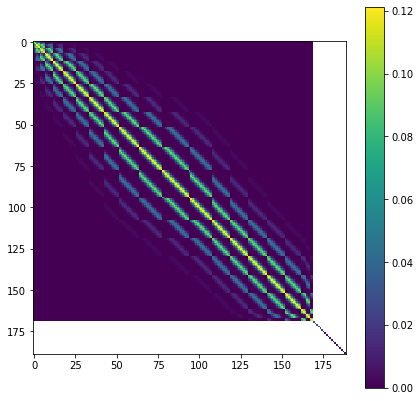

In [17]:
pst = pf.build_pst("{}.pst".format(case))
cov = pf.build_prior()
x = cov.x.copy()
x[x==0.0] = np.NaN
fig,ax = plt.subplots(1,1,figsize=(7,7))
g = ax.imshow(x)
plt.colorbar(g)

#### Tikhonov

In [18]:
# I  will add a zero order thikonov (preferred value) and initial values needs to be appropriate
# I extract reference k from the 2D model already manually calibrated with minimize and calculate the ratio with the inversion k (1e-5)
# Each pp will have an initial value

ref_k = np.loadtxt("../../Modeles2D/test_premier_model/working/k.txt")
inv_k = np.loadtxt("workspace/k.txt")

mask = (pst.parameter_data[pst.parameter_data["pargp"]=="kp_inst:0"].i.values.astype(int),
  pst.parameter_data[pst.parameter_data["pargp"]=="kp_inst:0"].j.values.astype(int)) # mask for pilot points locations

parval = (ref_k/inv_k)[mask] # calculate initial multiplier value

pst.parameter_data.parval1.iloc[:parval.shape[0]] = parval # change initial value given manually calibrated k

#setup zero order tikho (preferred value regularization)
pyemu.helpers.zero_order_tikhonov(pst)
# pst.prior_information.iloc[153:,-1]=0 # only regularization on pilot points

C:\Users\emmal\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
t_d = "template"
m_d = "master_glm"

pst.control_data.noptmax = -1 # FOR JACOBIAN
pst.write(os.path.join(t_d,"{}.pst".format(case)))

noptmax:-1, npar_adj:189, nnz_obs:322


In [20]:
# pyemu.os_utils.run("..\..\pestpp-glm.exe {}".format(case),cwd="template")

In [21]:
# LET'S FILL JACOBIAN WITH n WORKERS !
pyemu.os_utils.start_workers(t_d,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=8,worker_root=".",master_dir=m_d)

In [ ]:
t_d ="master_glm"
case = "2D_test"
pst = pyemu.Pst(os.path.join(t_d,"{}.pst".format(case)))
pst.control_data.noptmax = 6 # number of iterations (should be set to a great value (50))
pst.control_data.nphistp = 6
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 4
pst.pestpp_options["glm_num_reals"] = 50 # how many draws
pst.pestpp_options["parcov"] = "{}.prior.cov".format(case)
pst.pestpp_options["base_jacobian"] = "{}.jcb".format(case)
pst.write(os.path.join(t_d,"{}.pst".format(case)))

In [ ]:
# DO the inversion
m_d = "master_glm_run"
pyemu.os_utils.start_workers(t_d,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=8,worker_root=".",
                             master_dir=m_d)